# **Installation**

In [1]:
!pip install scikit-posthocs

# **Libraries to import**

In [2]:
import pandas as pd
import scikit_posthocs as sp
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu
import scipy.stats
import itertools
from scipy.stats import shapiro
import scipy.stats as S
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import sklearn.decomposition as SD
from statsmodels.stats.multitest import multipletests

# **Data Reading**

In [3]:
df = pd.read_csv('/content/habits.data', sep=';')

In [4]:
df.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,51012.921795,1.403846,1.464103,1.520513,1.510256,6.161538
std,584.776648,0.490982,0.499030,0.499900,0.775853,1.603769
min,50002.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,50501.750000,1.000000,1.000000,1.000000,1.000000,5.000000
50%,51043.000000,1.000000,1.000000,2.000000,1.000000,6.000000
75%,51517.000000,2.000000,2.000000,2.000000,2.000000,7.000000
max,51982.000000,2.000000,2.000000,2.000000,3.000000,9.000000


# **Data Preparation and Cleaning**

In [5]:
# function to convert ? to 0 and to ocnvert hh:mm to minutes
def standardize_time_column(value):
    if isinstance(value, str):
        clean_str = value.strip()
        if clean_str in ('?'):
            return 0
        if ":" in clean_str:
                hours, minutes = map(int, clean_str.split(":"))
                return float((hours * 60) + minutes)
        else:
            return float(clean_str)
    return None

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kohde   780 non-null    int64  
 1   jasen   780 non-null    int64  
 2   pvknro  780 non-null    int64  
 3   sp      780 non-null    int64  
 4   ASALUE  780 non-null    float64
 5   IKAL1   780 non-null    int64  
 6   A1      780 non-null    object 
 7   A2      780 non-null    object 
 8   A3      780 non-null    object 
 9   A4      780 non-null    object 
 10  A5      780 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


In [7]:
def covert_sp_male_female(v): # function to convert as Male and Female
    if v == 1:
        return 'Male'
    else:
        return 'Female'

In [8]:
df['Gender'] = df['sp'].apply(covert_sp_male_female) # new variable Gender

In [9]:
df.groupby('Gender').count()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,A5
Gender,,,,,,,,,,,
Female,406,406,406,406,406,406,406,406,406,406,406
Male,374,374,374,374,374,374,374,374,374,374,374


In [10]:
male_percentage = (df['Gender'] == 'Male').mean() * 100
female_percentage = (df['Gender'] == 'Female').mean() * 100

In [11]:
print(f'Male % = {male_percentage.round(2)}')
print(f'Female % = {female_percentage.round(2)}')

Male % = 47.95
Female % = 52.05


In [12]:
def covert_living_env(v): # function to convert living environment values to strings
    if v == 1:
        return 'City'
    elif v==2:
        return 'Municipality'
    else:
        return 'Rural Area'

In [13]:
df['Living Environment'] = df['ASALUE'].apply(covert_living_env)
df.groupby('Living Environment').count()
envir=['City','Municipality','Rural Area']
print('Living Environment:\n')
for i in envir:
  print(f'{i}: {(df["Living Environment"] == i).mean()*100:.2f}%')

Living Environment:

City: 66.54%
Municipality: 15.90%
Rural Area: 17.56%


In [14]:
def covert_day_of_week(v): #function to convert Day Type
    if v == 1:
        return 'Working Day'
    else:
        return 'Weekend'

In [15]:
df['Day Type'] = df['pvknro'].apply(covert_day_of_week)
df.groupby('Day Type').count()
daytype=['Working Day','Weekend']
print('Day Type:\n')
for i in daytype:
  print(f'{i}: {(df["Day Type"] == i).mean()*100:.2f}%')

Day Type:

Working Day: 53.59%
Weekend: 46.41%


In [16]:
  def convert_age_group(v): # to convert age group
    if v == 3:
      return '20-24'
    elif v == 4:
      return '25-34'
    elif v == 5:
      return '35-44'
    elif v == 6:
      return '45-54'
    elif v == 7:
      return '55-64'
    elif v == 8:
      return '65-74'
    else:
      return '75+'

In [17]:
df['Age Group']=df['IKAL1'].apply(convert_age_group)

In [18]:
age_groups = ['20-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

for group in age_groups:
    percentage = (df['Age Group'] == group).mean() * 100
    print(f"{group}: {percentage:.2f}%")


20-24: 4.36%
25-34: 13.59%
35-44: 16.92%
45-54: 21.79%
55-64: 21.15%
65-74: 14.36%
75+: 7.82%


In [19]:
df.head(4)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,A5,Gender,Living Environment,Day Type,Age Group
0,50002,1,2,1,1.0,6,190,450,13,2.0,1.0,Male,City,Weekend,45-54
1,50002,2,2,2,1.0,6,235,480,52,1.0,1.0,Female,City,Weekend,45-54
2,50009,1,2,2,1.0,7,175,460,104,1.0,1.0,Female,City,Weekend,55-64
3,50011,1,2,2,3.0,4,180,460,0,1.0,1.0,Female,Rural Area,Weekend,25-34


In [20]:
df['Working'] = df['A1'].apply(standardize_time_column)

In [21]:
#to convert ? to NAN and to convert hh:mm to minutes

def convert_a2_to_minutes(value):
    if isinstance(value, str):
        clean_str = value.strip()
        if clean_str in ('?'):
            return None # Return None for '?' to be filled later
        if ":" in clean_str:
                hours, minutes = map(int, clean_str.split(":"))
                return float((hours * 60) + minutes)
        else:
                return float(clean_str)
    return None

In [22]:
# Apply the conversion function to create a new column with numeric minutes and NaNs
df['Sleeping'] = df['A2'].apply(convert_a2_to_minutes)

In [23]:
# Perform group-wise median imputation on the new numeric column
df['Sleeping'] = df.groupby(['IKAL1', 'sp'])['Sleeping'].transform(lambda x: x.fillna(x.median()))

In [24]:
#df['A2_Minutes'] = df['A2_Minutes'].astype(int) # convert float into int for the decimals of the mean values

In [25]:
#df['A2_Minutes'] = df['A2_Minutes'].astype(float) # convert back into float from int because others are in float

In [26]:
df['Reading'] = df['A3'].apply(standardize_time_column)

In [27]:
df.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,Working,Sleeping,Reading
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,51012.921795,1.403846,1.464103,1.520513,1.510256,6.161538,77.987179,529.173077,56.652564
std,584.776648,0.490982,0.499030,0.499900,0.775853,1.603769,160.344782,103.289861,75.467621
min,50002.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,120.000000,0.000000
25%,50501.750000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,470.000000,0.000000
50%,51043.000000,1.000000,1.000000,2.000000,1.000000,6.000000,0.000000,530.000000,30.000000
75%,51517.000000,2.000000,2.000000,2.000000,2.000000,7.000000,3.750000,590.000000,80.000000
max,51982.000000,2.000000,2.000000,2.000000,3.000000,9.000000,910.000000,1050.000000,572.000000


In [28]:
#df.to_csv('cleaned_habits.csv', index=False)

In [29]:
df.columns[9:11]

Index(['A4', 'A5'], dtype='object')

In [30]:
for i in df.columns[9:11]: # to convert A4 and A5 to numeric data type
    df[i+'_New'] = pd.to_numeric(df[i], errors='coerce')

In [31]:
df.head(10)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,A5,Gender,Living Environment,Day Type,Age Group,Working,Sleeping,Reading,A4_New,A5_New
0,50002,1,2,1,1.0,6,190,450,13,2.0,1.0,Male,City,Weekend,45-54,190.0,450.0,13.0,2.0,1.0
1,50002,2,2,2,1.0,6,235,480,52,1.0,1.0,Female,City,Weekend,45-54,235.0,480.0,52.0,1.0,1.0
2,50009,1,2,2,1.0,7,175,460,104,1.0,1.0,Female,City,Weekend,55-64,175.0,460.0,104.0,1.0,1.0
3,50011,1,2,2,3.0,4,180,460,0,1.0,1.0,Female,Rural Area,Weekend,25-34,180.0,460.0,0.0,1.0,1.0
4,50012,1,1,2,1.0,8,0,600,10,2.0,2.0,Female,City,Working Day,65-74,0.0,600.0,10.0,2.0,2.0
5,50015,1,1,1,3.0,8,0,480,310,2.0,1.0,Male,Rural Area,Working Day,65-74,0.0,480.0,310.0,2.0,1.0
6,50015,2,1,2,3.0,8,0,520,40,2.0,1.0,Female,Rural Area,Working Day,65-74,0.0,520.0,40.0,2.0,1.0
7,50022,1,1,2,1.0,6,480,570,0,2.0,1.0,Female,City,Working Day,45-54,480.0,570.0,0.0,2.0,1.0
8,50024,1,2,1,1.0,4,340,490,0,2.0,1.0,Male,City,Weekend,25-34,340.0,490.0,0.0,2.0,1.0
9,50030,1,2,1,2.0,6,0,570,91,1.0,1.0,Male,Municipality,Weekend,45-54,0.0,570.0,91.0,1.0,1.0


In [32]:
df.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,Working,Sleeping,Reading,A4_New,A5_New
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,740.000000,742.000000
mean,51012.921795,1.403846,1.464103,1.520513,1.510256,6.161538,77.987179,529.173077,56.652564,4.214865,2.098383
std,584.776648,0.490982,0.499030,0.499900,0.775853,1.603769,160.344782,103.289861,75.467621,22.164560,11.127759
min,50002.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,50501.750000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,470.000000,0.000000,1.000000,1.000000
50%,51043.000000,1.000000,1.000000,2.000000,1.000000,6.000000,0.000000,530.000000,30.000000,1.500000,1.000000
75%,51517.000000,2.000000,2.000000,2.000000,2.000000,7.000000,3.750000,590.000000,80.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,3.000000,9.000000,910.000000,1050.000000,572.000000,240.000000,180.000000


In [33]:
#df['A4'].info()

In [34]:
#df['A4'].mode()[0]

In [35]:
# to convert 0s and NANs of A4 and A5 using mode()

for i in df.columns[18:20]:
  print('Mode() of '+i+' is ',df[i].mode()[0])
  df[i] = df[i].fillna(df[i].mode()[0])
  df.loc[df[i] == 0, i] = 2
  df.loc[df[i] > 2, i] = 1

Mode() of A4_New is  1.0
Mode() of A5_New is  1.0


In [36]:
#for i in df['A4_New']:
 # print(i)

In [37]:
df.head(5)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,A5,Gender,Living Environment,Day Type,Age Group,Working,Sleeping,Reading,A4_New,A5_New
0,50002,1,2,1,1.0,6,190,450,13,2.0,1.0,Male,City,Weekend,45-54,190.0,450.0,13.0,2.0,1.0
1,50002,2,2,2,1.0,6,235,480,52,1.0,1.0,Female,City,Weekend,45-54,235.0,480.0,52.0,1.0,1.0
2,50009,1,2,2,1.0,7,175,460,104,1.0,1.0,Female,City,Weekend,55-64,175.0,460.0,104.0,1.0,1.0
3,50011,1,2,2,3.0,4,180,460,0,1.0,1.0,Female,Rural Area,Weekend,25-34,180.0,460.0,0.0,1.0,1.0
4,50012,1,1,2,1.0,8,0,600,10,2.0,2.0,Female,City,Working Day,65-74,0.0,600.0,10.0,2.0,2.0


In [38]:
def convert_a4_5_to_yes_no(v):
  if v == 1:
    return 'Yes'
  else:
    return 'No'

In [39]:
df['A4_New_'] = df['A4_New'].apply(convert_a4_5_to_yes_no)
df['A5_New_'] = df['A5_New'].apply(convert_a4_5_to_yes_no)

In [40]:
df2 = df.drop(columns=df.columns[0:15])

In [41]:
df2.drop(columns=['A4_New_','A5_New_'],inplace=True)

In [42]:
df2.drop(columns=['A4_New','A5_New'],inplace=True)

In [43]:
df2.head(1) # df2 only contains the continuous activities

,Working,Sleeping,Reading
0,190.0,450.0,13.0


# **Graphs** (Descriptive Analysis)

In [44]:
#for i in df.columns[6:11]:
 # print(df[i])

In [45]:
#df = df.drop(columns=df.columns[6:11])

In [46]:
df.head(2)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,...,Living Environment,Day Type,Age Group,Working,Sleeping,Reading,A4_New,A5_New,A4_New_,A5_New_
0,50002,1,2,1,1.0,6,190,450,13,2.0,...,City,Weekend,45-54,190.0,450.0,13.0,2.0,1.0,No,Yes
1,50002,2,2,2,1.0,6,235,480,52,1.0,...,City,Weekend,45-54,235.0,480.0,52.0,1.0,1.0,Yes,Yes


In [47]:
df.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,Working,Sleeping,Reading,A4_New,A5_New
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,51012.921795,1.403846,1.464103,1.520513,1.510256,6.161538,77.987179,529.173077,56.652564,1.464103,1.316667
std,584.776648,0.490982,0.499030,0.499900,0.775853,1.603769,160.344782,103.289861,75.467621,0.499030,0.465475
min,50002.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,120.000000,0.000000,1.000000,1.000000
25%,50501.750000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,470.000000,0.000000,1.000000,1.000000
50%,51043.000000,1.000000,1.000000,2.000000,1.000000,6.000000,0.000000,530.000000,30.000000,1.000000,1.000000
75%,51517.000000,2.000000,2.000000,2.000000,2.000000,7.000000,3.750000,590.000000,80.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,3.000000,9.000000,910.000000,1050.000000,572.000000,2.000000,2.000000


In [48]:
#df.isna().sum()

In [49]:
#df.to_csv('updated_habits.csv',index=False)

In [50]:
df.head(1)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,...,Living Environment,Day Type,Age Group,Working,Sleeping,Reading,A4_New,A5_New,A4_New_,A5_New_
0,50002,1,2,1,1.0,6,190,450,13,2.0,...,City,Weekend,45-54,190.0,450.0,13.0,2.0,1.0,No,Yes


/tmp/ipython-input-2584015022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='Age Group', palette='coolwarm', order=order)


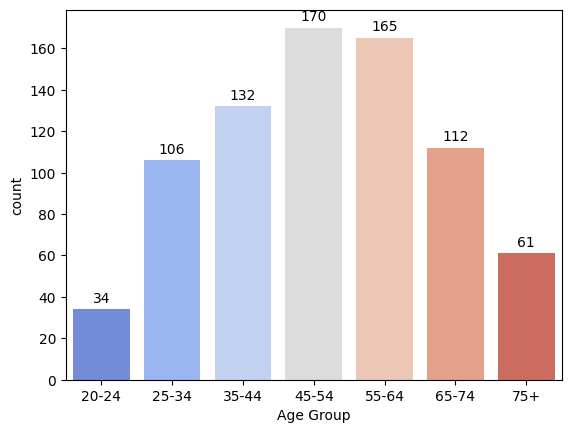

In [51]:
order = ["20-24", "25-34", "35-44", "45-54","55-64","65-74","75+"]
ax=sns.countplot(df,x='Age Group', palette='coolwarm', order=order)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')
plt.show()
# '1 = 10-14', '2 = 15-19', '3 = 20-24','4 = 25-34', '5 = 35-44', '6 = 45-54', '7 = 55-64','8 = 65-74', '9 = 75+'

According to the above graph, we came to conclusion that the age between 35-64 years has 59.87% in the data distribution.

/tmp/ipython-input-2203890351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='coolwarm', order=age_order) #this plot has been ordered using age group


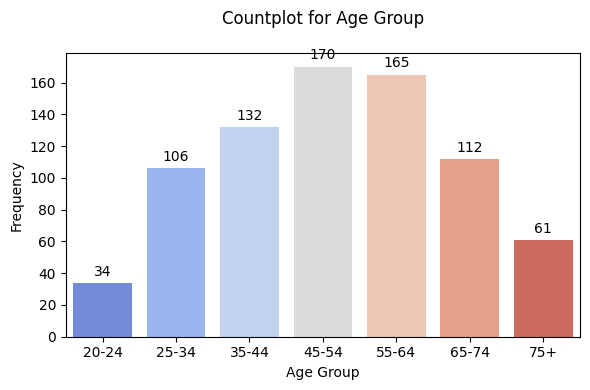

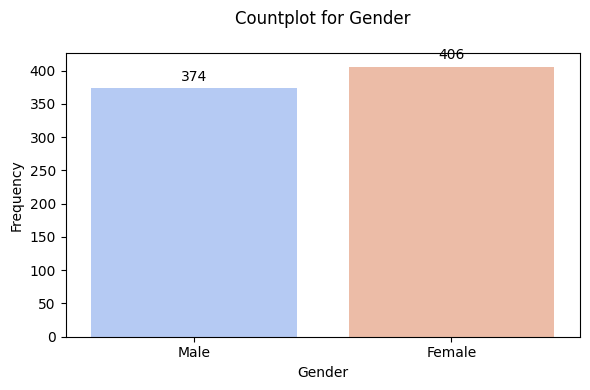

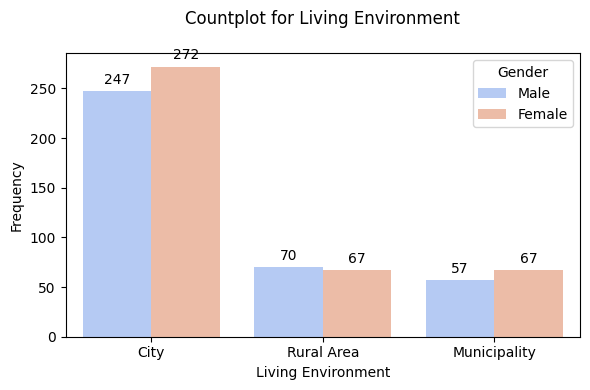

In [52]:
age_order = ["20-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"] # to maintain the order for age group
cols = ['Age Group', 'Gender', 'Living Environment'] #columns used

for col in cols:
    plt.figure(figsize=(6, 4))
    if col == 'Age Group':
        ax = sns.countplot(data=df, x=col, palette='coolwarm', order=age_order) #this plot has been ordered using age group
    else:
        ax = sns.countplot(data=df, x=col, palette='coolwarm',hue='Gender')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')
    plt.title(f"Countplot for {col}\n")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-4186557286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


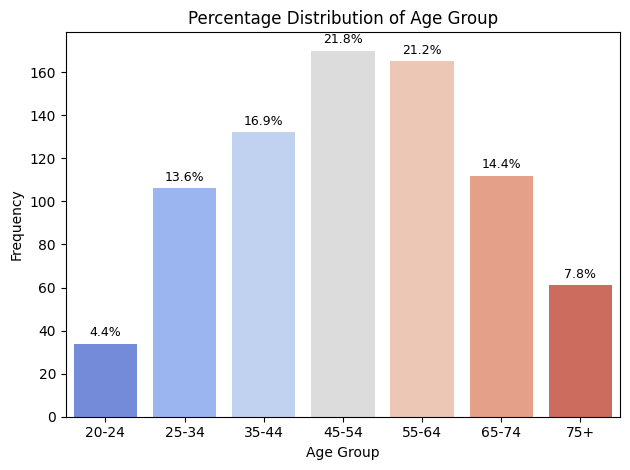

/tmp/ipython-input-4186557286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


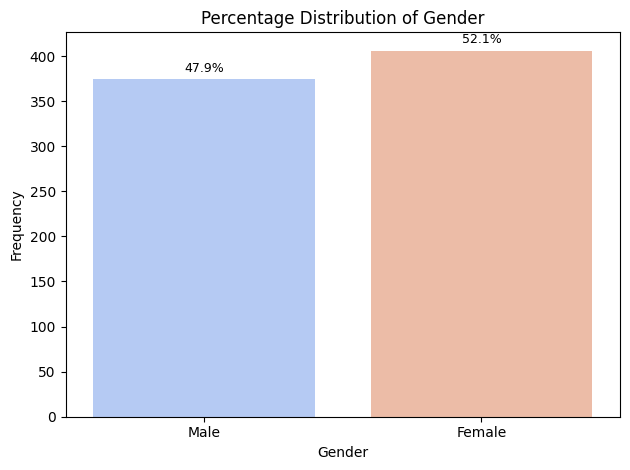

/tmp/ipython-input-4186557286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


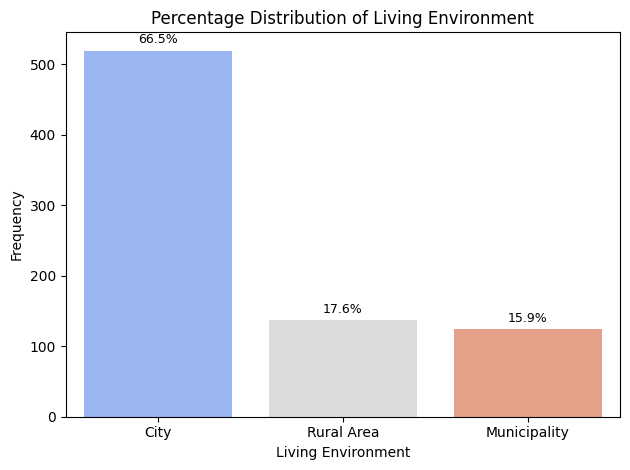

In [53]:
# calculate the percentages distribution

def plot_countplot_with_percent(df, col, order=None, palette='coolwarm'):
    ax = sns.countplot(data=df, x=col, order=order, palette=palette)
    total = len(df)
    for container in ax.containers:
        ax.bar_label(container,
                     labels=[f'{(v.get_height()/total)*100:.1f}%' for v in container],
                     label_type='edge', padding=3, fontsize=9, color='black')
    plt.title(f"Percentage Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

for c in ['Age Group', 'Gender', 'Living Environment']:
    plot_countplot_with_percent(df, col=c, order=age_order if c == 'Age Group' else None)


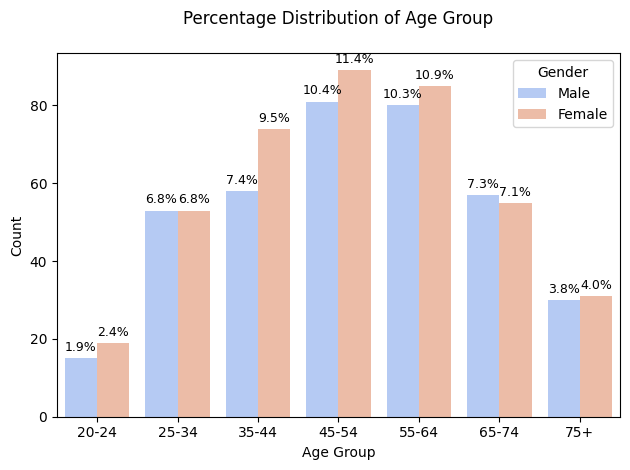

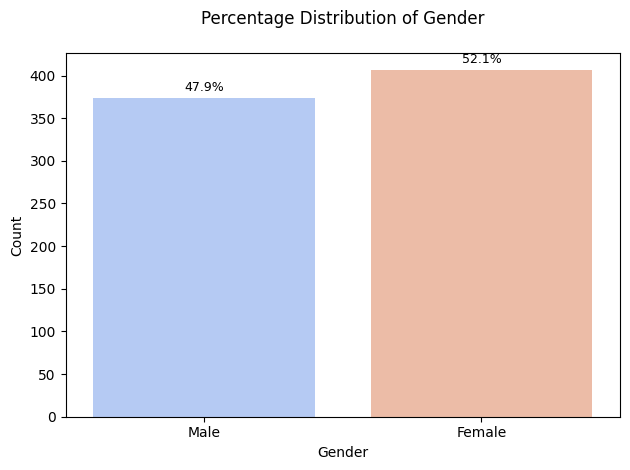

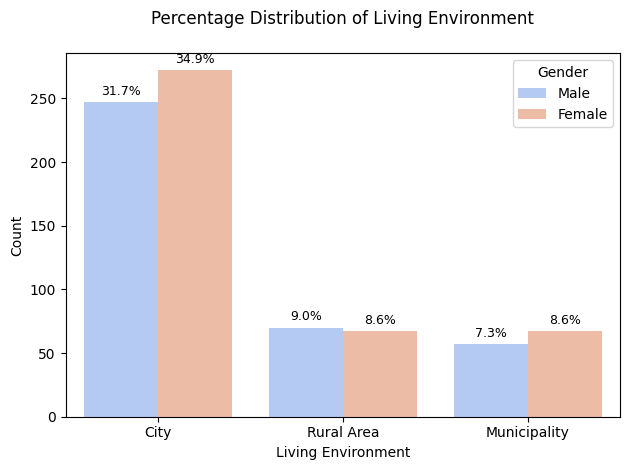

In [54]:
def plot_countplot_with_percent(df, col, order=None, palette='coolwarm'):
    ax = sns.countplot(data=df, x=col, order=order, palette=palette, hue='Gender')
    total = len(df)
    for container in ax.containers:
        ax.bar_label(container,
                     labels=[f'{(v.get_height()/total)*100:.1f}%' for v in container],
                     label_type='edge', padding=3, fontsize=9, color='black')
    plt.title(f"Percentage Distribution of {col}\n")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

for c in ['Age Group', 'Gender', 'Living Environment']:
    plot_countplot_with_percent(df, col=c, order=age_order if c == 'Age Group' else None)

In [55]:
count=df.groupby(['Gender','Living Environment']).size().reset_index(name='count')

In [56]:
print(count)

   Gender Living Environment  count
0  Female               City    272
1  Female       Municipality     67
2  Female         Rural Area     67
3    Male               City    247
4    Male       Municipality     57
5    Male         Rural Area     70


/tmp/ipython-input-4270737789.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=count["Gender & Living Environment"], y=count["count"], palette=plt.cm.Pastel2.colors, order=order_labels)


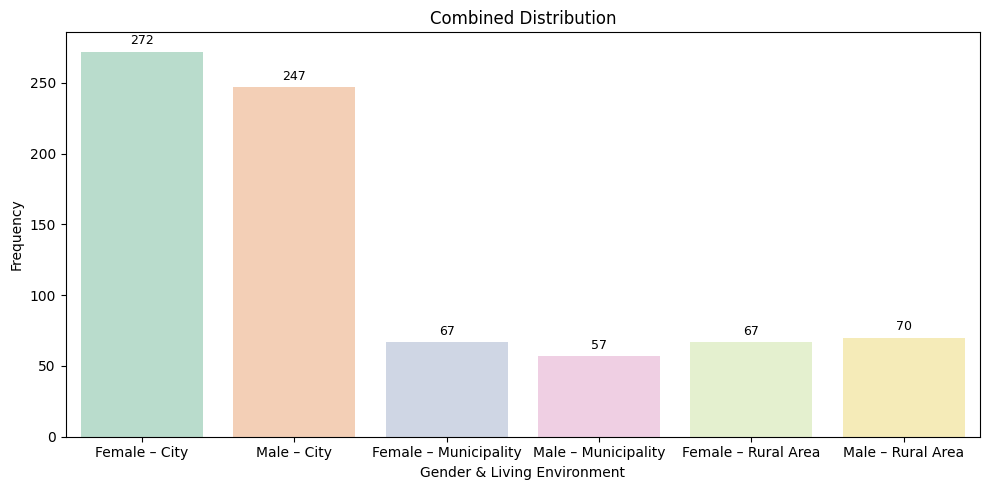

In [57]:
ordre=['City','Municipality','Rural Area']
count["Gender & Living Environment"] = count["Gender"] + " – " + count["Living Environment"]

sp_values = count['Gender'].unique().tolist()
order_labels = []
for area in ordre:
    for sp in sp_values:
        order_labels.append(f"{sp} – {area}")

# Filter order_labels to only those present in count (prevents missing combos)
order_labels = [lbl for lbl in order_labels if lbl in count['Gender & Living Environment'].values]

plt.figure(figsize=(10,5))
ax3 = sns.barplot(x=count["Gender & Living Environment"], y=count["count"], palette=plt.cm.Pastel2.colors, order=order_labels)

total = count["count"].sum()
for container in ax3.containers:
    ax3.bar_label(container,fmt='%d',
                  label_type='edge', padding=3, fontsize=9, color='black')
plt.title("Combined Distribution")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [58]:
#df.describe()

In [59]:
#!rm -rf /data/charts

In [60]:
#ai_avg= (df['A1_Minutes'].sum())/780

In [61]:
#df = df.drop(columns=['time spend on daily activity'])

In [62]:
#averages=df.describe().iloc[1:2,6:9]

In [63]:
#print(ai_avg)

In [64]:
#print(df.columns[6:9])

In [65]:
#averages

# **Estimate how much time on average** (using mean) **Finnish households spend daily on each activity.**

In [66]:
average_time_on_daily_activity=df.describe().iloc[1:2,6:9].round(2).iloc[0].tolist() # daily activity average for A1, A2, and A3

In [67]:
average_time_on_daily_activity # average time in minutes spent on daily basis by a household (mean)

[77.99, 529.17, 56.65]

In [68]:
average_time_per_hour_daily = (np.array(average_time_on_daily_activity) / 60).round(2) # we have change the list to array here for our usage
print(average_time_per_hour_daily) #time spent in hours on daily basis by every household

[1.3  8.82 0.94]


**The Avearge time (hours) spent by the Finnish Households for the activities Working, Sleeping, and Reading are 1.3, 8.82, and 0.94 respectively.** (In this analysis 0s are not eliminated)

In [69]:
# Remove rows where A1_Minutes is 0
df0 = df[df['Working'] != 0]
df0.reset_index(drop=True, inplace=True)

In [70]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kohde               195 non-null    int64  
 1   jasen               195 non-null    int64  
 2   pvknro              195 non-null    int64  
 3   sp                  195 non-null    int64  
 4   ASALUE              195 non-null    float64
 5   IKAL1               195 non-null    int64  
 6   A1                  195 non-null    object 
 7   A2                  195 non-null    object 
 8   A3                  195 non-null    object 
 9   A4                  195 non-null    object 
 10  A5                  195 non-null    object 
 11  Gender              195 non-null    object 
 12  Living Environment  195 non-null    object 
 13  Day Type            195 non-null    object 
 14  Age Group           195 non-null    object 
 15  Working             195 non-null    float64
 16  Sleeping

<Axes: ylabel='Working'>

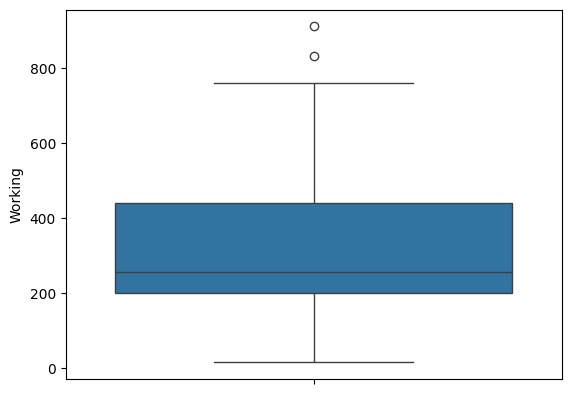

In [71]:
sns.boxplot(df0['Working'])

In [72]:
average_time_spent_A1_without_0=df0.describe().iloc[1:2,6:7].round(2).iloc[0].tolist()
print(average_time_spent_A1_without_0)
print((np.array(average_time_spent_A1_without_0) / 60).round(2))

[311.95]
[5.2]


**By Removing the outliers**

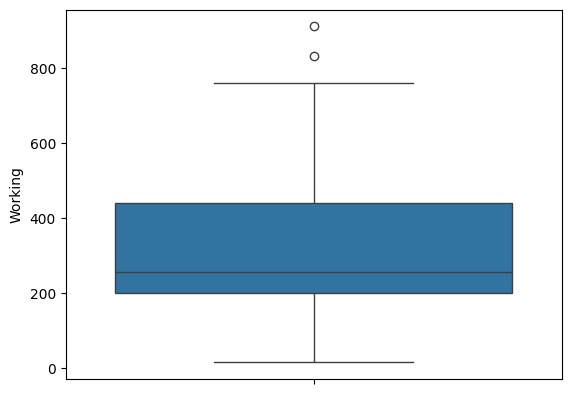

In [73]:
sns.boxplot(df0['Working'])
plt.show()

In [74]:
#df0.head(10)

In [75]:
average_time_spent_A1_without_0=df0.describe().iloc[1:2,6:7].round(2).iloc[0].tolist()

In [76]:
average_time_spent_A1_without_0 #Minutes for A1

[311.95]

In [77]:
(np.array(average_time_spent_A1_without_0) / 60).round(2) #hours for A1

array([5.2])

<Axes: ylabel='Sleeping'>

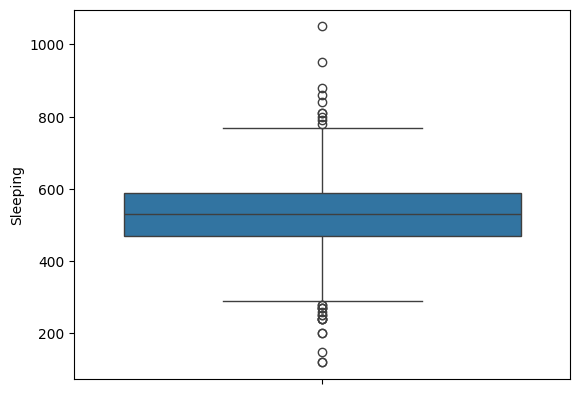

In [78]:
sns.boxplot(df['Sleeping'])

<Axes: xlabel='Sleeping', ylabel='Count'>

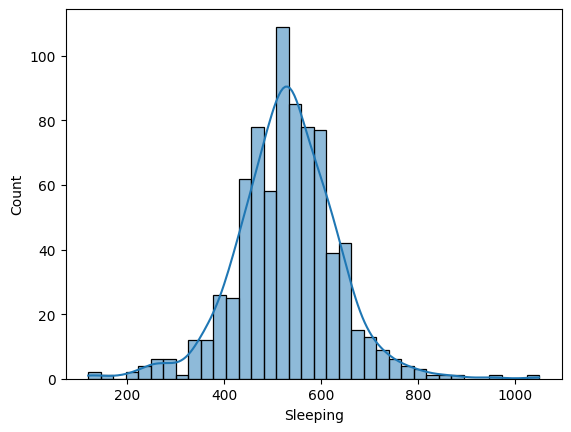

In [79]:
sns.histplot(df['Sleeping'],kde=True)

In [80]:
df.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,Working,Sleeping,Reading,A4_New,A5_New
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,51012.921795,1.403846,1.464103,1.520513,1.510256,6.161538,77.987179,529.173077,56.652564,1.464103,1.316667
std,584.776648,0.490982,0.499030,0.499900,0.775853,1.603769,160.344782,103.289861,75.467621,0.499030,0.465475
min,50002.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,120.000000,0.000000,1.000000,1.000000
25%,50501.750000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,470.000000,0.000000,1.000000,1.000000
50%,51043.000000,1.000000,1.000000,2.000000,1.000000,6.000000,0.000000,530.000000,30.000000,1.000000,1.000000
75%,51517.000000,2.000000,2.000000,2.000000,2.000000,7.000000,3.750000,590.000000,80.000000,2.000000,2.000000
max,51982.000000,2.000000,2.000000,2.000000,3.000000,9.000000,910.000000,1050.000000,572.000000,2.000000,2.000000


In [81]:
df9=df[(df['Reading']!=0)] # remove 0s

In [82]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 779
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kohde               511 non-null    int64  
 1   jasen               511 non-null    int64  
 2   pvknro              511 non-null    int64  
 3   sp                  511 non-null    int64  
 4   ASALUE              511 non-null    float64
 5   IKAL1               511 non-null    int64  
 6   A1                  511 non-null    object 
 7   A2                  511 non-null    object 
 8   A3                  511 non-null    object 
 9   A4                  511 non-null    object 
 10  A5                  511 non-null    object 
 11  Gender              511 non-null    object 
 12  Living Environment  511 non-null    object 
 13  Day Type            511 non-null    object 
 14  Age Group           511 non-null    object 
 15  Working             511 non-null    float64
 16  Sleeping     

<Axes: ylabel='Reading'>

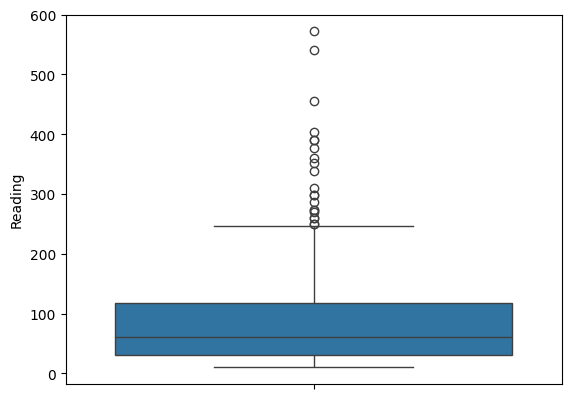

In [83]:
sns.boxplot(df9['Reading'])

# **Estimate how much time on average** (using median) **Finnish households spend daily on each activity.** (median was used because of the outliers)

In [84]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kohde               195 non-null    int64  
 1   jasen               195 non-null    int64  
 2   pvknro              195 non-null    int64  
 3   sp                  195 non-null    int64  
 4   ASALUE              195 non-null    float64
 5   IKAL1               195 non-null    int64  
 6   A1                  195 non-null    object 
 7   A2                  195 non-null    object 
 8   A3                  195 non-null    object 
 9   A4                  195 non-null    object 
 10  A5                  195 non-null    object 
 11  Gender              195 non-null    object 
 12  Living Environment  195 non-null    object 
 13  Day Type            195 non-null    object 
 14  Age Group           195 non-null    object 
 15  Working             195 non-null    float64
 16  Sleeping

In [85]:
print(df9['Reading'].median()) # after removing 0s
# 60 minutes

60.0


In [86]:
print(df9['Reading'].median()/60) # reading in hours

1.0


In [87]:
print(df['Sleeping'].median())

530.0


In [88]:
print(round(df['Sleeping'].median()/60, 2)) # sleeping in hours

8.83


In [89]:
print(df0['Working'].median()) # after removing 0s

255.0


In [90]:
print(df0['Working'].median()/60) # working in hours

4.25


In [91]:
df9.describe()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,Working,Sleeping,Reading,A4_New,A5_New
count,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,50986.553816,1.420744,1.46184,1.551859,1.536204,6.553816,64.305284,528.228963,86.475538,1.483366,1.324853
std,591.122237,0.494162,0.49903,0.497791,0.786005,1.507023,147.713477,97.326237,78.200841,0.500213,0.468779
min,50002.000000,1.000000,1.00000,1.000000,1.000000,3.000000,0.000000,200.000000,10.000000,1.000000,1.000000
25%,50460.000000,1.000000,1.00000,1.000000,1.000000,6.000000,0.000000,470.000000,30.000000,1.000000,1.000000
50%,50959.000000,1.000000,1.00000,2.000000,1.000000,7.000000,0.000000,530.000000,60.000000,1.000000,1.000000
75%,51505.000000,2.000000,2.00000,2.000000,2.000000,8.000000,0.000000,590.000000,117.000000,2.000000,2.000000
max,51982.000000,2.000000,2.00000,2.000000,3.000000,9.000000,830.000000,950.000000,572.000000,2.000000,2.000000


In [92]:
#Time spent in minutes for Dine-In and Visiting_Library

columns = ['A4_New', 'A5_New']
values_to_check = [1.0, 2.0]
all_counts = [[df[col].value_counts().get(v, 0) for v in values_to_check] for col in columns]
print(all_counts)

[[np.int64(418), np.int64(362)], [np.int64(533), np.int64(247)]]


In [93]:
#average time spent in hours for Dine-In and Visiting Library

for a in all_counts:
  percentages = [(count / 780) * 100 for count in a]
  print([round(p, 2) for p in percentages])

[np.float64(53.59), np.float64(46.41)]
[np.float64(68.33), np.float64(31.67)]


**About 53.6% persons have dines out and 68.3% persons visited the library for the past year**

***Those who visit ibrary but didn't read***

In [94]:
lib_visit=df['A5_New'].sum()
no_read=df[(df['A5_New'] == 2.0) & (df['Reading']==0)].shape[0]
print(f"Visiting Library but not Reading: {((no_read/lib_visit)*100):.2f}%")

Visiting Library but not Reading: 7.89%


# **Average time in activities with demograhpic variables.** **Plot using median() and also df, df0, and df9** (instead of only original df)

In [95]:
df.columns[15:18]

Index(['Working', 'Sleeping', 'Reading'], dtype='object')

/tmp/ipython-input-613171565.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3=sns.barplot(x='Activity', y='Value', hue='Gender', data=df_G_A, palette='coolwarm',ci=None)


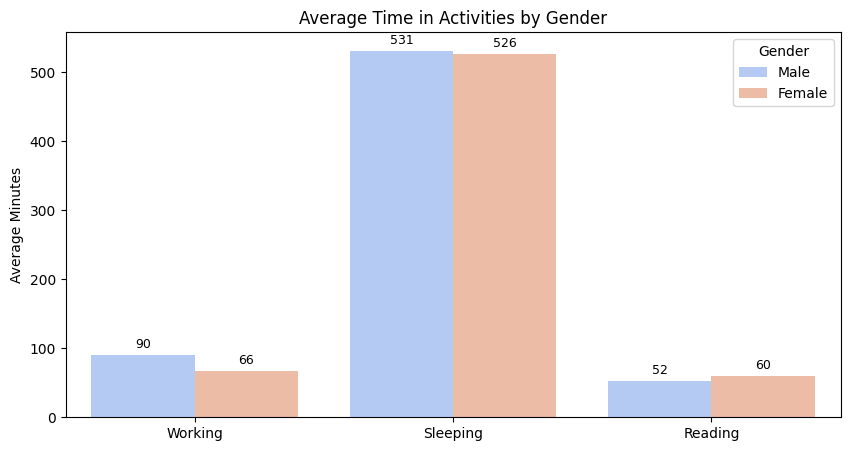

In [96]:
df_G_A = df.melt(id_vars='Gender',
                  value_vars=df.columns[15:18],
                  var_name='Activity',
                  value_name='Value')

plt.figure(figsize=(10,5))
ax3=sns.barplot(x='Activity', y='Value', hue='Gender', data=df_G_A, palette='coolwarm',ci=None)

for container in ax3.containers:
    ax3.bar_label(container,fmt='%d', label_type='edge', padding=3, fontsize=9, color='black')

plt.title("Average Time in Activities by Gender")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

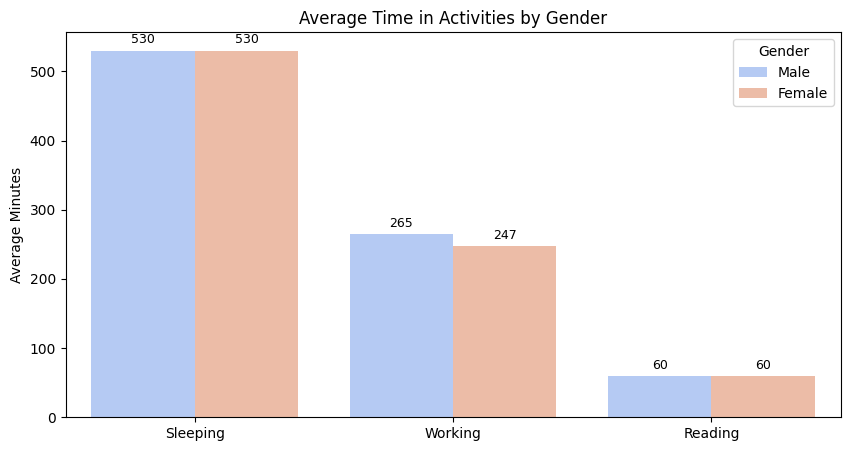

In [97]:
df_sleeping = df[['Gender', 'Sleeping']].rename(columns={'Sleeping':'Value'})
df_sleeping['Activity'] = 'Sleeping'

df_working = df0[['Gender', 'Working']].rename(columns={'Working':'Value'})
df_working['Activity'] = 'Working'

df_reading = df9[['Gender', 'Reading']].rename(columns={'Reading':'Value'})
df_reading['Activity'] = 'Reading'

df_all = pd.concat([df_sleeping, df_working, df_reading], ignore_index=True)

# Plot using median
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Activity', y='Value', hue='Gender', data=df_all,estimator=np.median, palette='coolwarm', errorbar=None)

# Adding bar labels for each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # get the median computed by seaborn
        ax.annotate(f'{int(height)}',xy=(bar.get_x() + bar.get_width()/2, height),xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average Time in Activities by Gender")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

/tmp/ipython-input-1829872183.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3=sns.barplot(x='Activity', y='Value', hue='Living Environment', data=df_LE_A, palette='coolwarm',ci=None, order=activity_order)


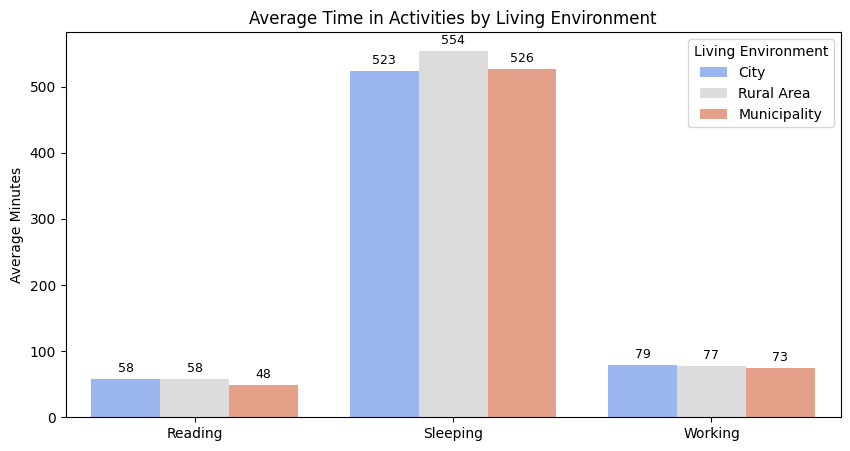

In [98]:
df_LE_A = df.melt(id_vars='Living Environment',
                  value_vars=df.columns[15:18],
                  var_name='Activity',
                  value_name='Value')

activity_order = df_LE_A['Activity'].sort_values().unique()
plt.figure(figsize=(10,5))

ax3=sns.barplot(x='Activity', y='Value', hue='Living Environment', data=df_LE_A, palette='coolwarm',ci=None, order=activity_order)

for container in ax3.containers:
    ax3.bar_label(container,fmt='%d', label_type='edge', padding=3, fontsize=9, color='black')

plt.title("Average Time in Activities by Living Environment")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

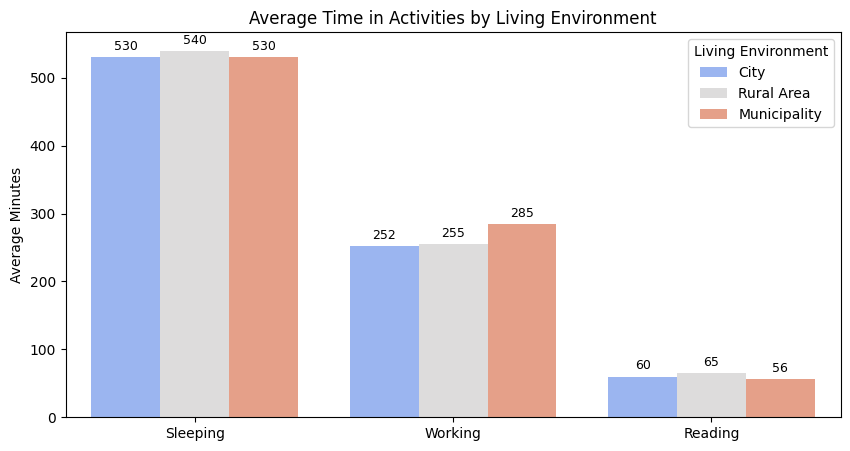

In [99]:
df_sleeping = df[['Living Environment', 'Sleeping']].rename(columns={'Sleeping':'Value'})
df_sleeping['Activity'] = 'Sleeping'

df_working = df0[['Living Environment', 'Working']].rename(columns={'Working':'Value'})
df_working['Activity'] = 'Working'

df_reading = df9[['Living Environment', 'Reading']].rename(columns={'Reading':'Value'})
df_reading['Activity'] = 'Reading'

df_all = pd.concat([df_sleeping, df_working, df_reading], ignore_index=True)

# Plot using median
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Activity', y='Value', hue='Living Environment', data=df_all,estimator=np.median, palette='coolwarm', errorbar=None)

# Adding bar labels for each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # get the median computed by seaborn
        ax.annotate(f'{int(height)}',xy=(bar.get_x() + bar.get_width()/2, height),xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average Time in Activities by Living Environment")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

In [100]:
# age_order = ["20-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
# activity_order = df.columns[15:18].tolist()  # or ['A','B','C'] etc.

# df_AG_A = df.melt(id_vars='Age Group',
#                   value_vars=df.columns[15:18],
#                   var_name='Activity',
#                   value_name='Value')

# agg = (df_AG_A
#        .groupby(['Activity', 'Age Group'], observed=True)['Value']
#        .mean() # using mean
#        .reset_index())

# plt.figure(figsize=(16,5))

# ax3 = sns.barplot(
#     data=agg,
#     x='Activity',
#     y='Value',
#     hue='Age Group',
#     order=activity_order,
#     hue_order=[a for a in age_order if a in df['Age Group'].unique()],  # only use present groups
#     ci=None,
#     palette='plasma',
#     dodge=True
# )

# # Annotate bars with one decimal place
# for container in ax3.containers:
#     labels = [f'{bar.get_height():.1f}' for bar in container]
#     ax3.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=9, color='black')

# plt.title("Average Time in Activities by Age Group")
# plt.xlabel("")
# plt.ylabel("Average Minutes")
# plt.show()

/tmp/ipython-input-1993270915.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(


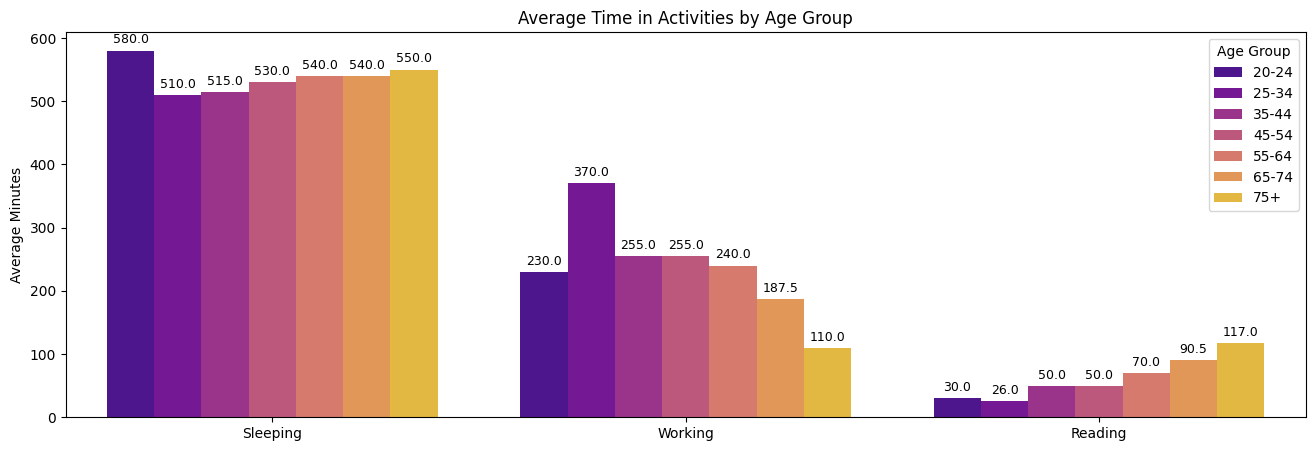

In [101]:
age_order = ["20-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
activity_order = ['Sleeping', 'Working', 'Reading']

df_sleeping_AG = df[['Age Group', 'Sleeping']].rename(columns={'Sleeping': 'Value'})
df_sleeping_AG['Activity'] = 'Sleeping'

df_working_AG = df0[['Age Group', 'Working']].rename(columns={'Working': 'Value'})
df_working_AG['Activity'] = 'Working'

df_reading_AG = df9[['Age Group', 'Reading']].rename(columns={'Reading': 'Value'})
df_reading_AG['Activity'] = 'Reading'

df_AG_all = pd.concat([df_sleeping_AG, df_working_AG, df_reading_AG], ignore_index=True)

agg = (df_AG_all
       .groupby(['Activity', 'Age Group'], observed=True)['Value']
       .median()
       .reset_index())

# Plot
plt.figure(figsize=(16,5))

ax3 = sns.barplot(
    data=agg,
    x='Activity',
    y='Value',
    hue='Age Group',
    order=activity_order,
    hue_order=[a for a in age_order if a in agg['Age Group'].unique()],
    ci=None,
    palette='plasma',
    dodge=True
)

# Annotate bars with one decimal place
for container in ax3.containers:
    labels = [f'{bar.get_height():.1f}' for bar in container]
    ax3.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=9, color='black')

plt.title("Average Time in Activities by Age Group")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

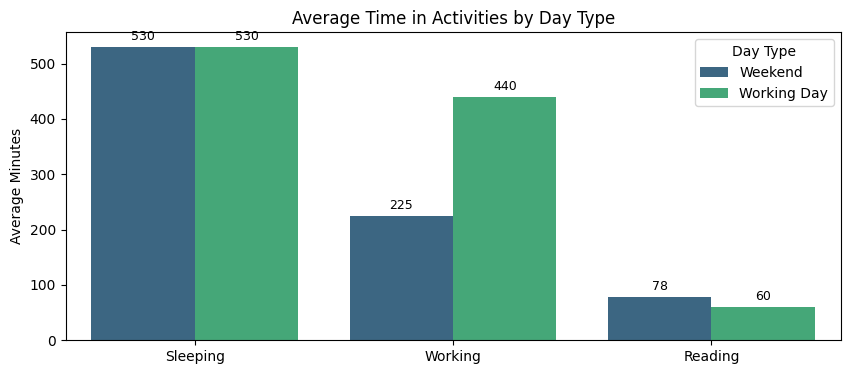

In [102]:
df_sleeping = df[['Day Type', 'Sleeping']].rename(columns={'Sleeping':'Value'})
df_sleeping['Activity'] = 'Sleeping'

df_working = df0[['Day Type', 'Working']].rename(columns={'Working':'Value'})
df_working['Activity'] = 'Working'

df_reading = df9[['Day Type', 'Reading']].rename(columns={'Reading':'Value'})
df_reading['Activity'] = 'Reading'

df_all = pd.concat([df_sleeping, df_working, df_reading], ignore_index=True)

# Plot using median
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Activity', y='Value', hue='Day Type', data=df_all,estimator=np.median, palette='viridis', errorbar=None)

# Add bar labels for each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # get the median computed by seaborn
        ax.annotate(f'{int(height)}',xy=(bar.get_x() + bar.get_width()/2, height),xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average Time in Activities by Day Type")
plt.xlabel("")
plt.ylabel("Average Minutes")
plt.show()

In [103]:
#df.describe()

# **Correlation among the Activities**

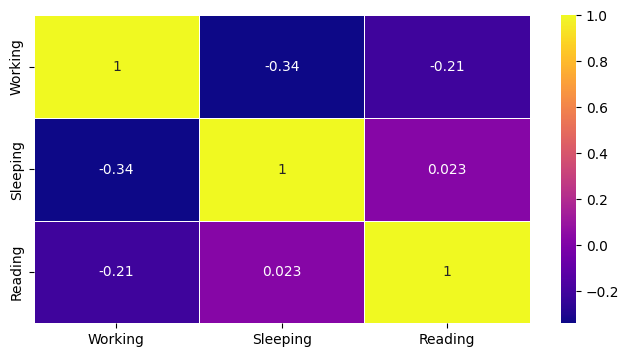

In [104]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['Working','Sleeping','Reading']].corr(method='spearman'), annot=True, cmap='plasma', linewidths=0.5)
plt.show()
#spearman is perfect in this case

In [105]:
from scipy.stats import spearmanr

In [106]:
cols = ['Working', 'Sleeping', 'Reading']

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1, col2 = cols[i], cols[j]
        corr, p_value = spearmanr(df[col1], df[col2])
        print(f"{col1} vs {col2}: correlation = {corr:.3f}, p-value = {p_value:.4f}")

Working vs Sleeping: correlation = -0.341, p-value = 0.0000
Working vs Reading: correlation = -0.210, p-value = 0.0000
Sleeping vs Reading: correlation = 0.023, p-value = 0.5165


# **PCA and Clusters**

In [107]:
scaler=StandardScaler()

In [108]:
scaler.fit(df2)

StandardScaler()

In [109]:
scaled_data = scaler.transform(df2)

In [110]:
pca = SD.PCA(n_components=2).fit(scaled_data)

In [111]:
pca.fit(scaled_data)

PCA(n_components=2)

In [112]:
x_pca = pca.transform(scaled_data)

In [113]:
scaled_data.shape

(780, 3)

In [114]:
x_pca.shape

(780, 2)

In [115]:
x_pca_df = pd.DataFrame(x_pca, index=df2.index)

df_extended = pd.concat([df2, x_pca_df], axis=1)

In [116]:
scores = pca.transform(scaled_data)[:, :2]
df_extended = pd.DataFrame(scores, columns=['PC1','PC2'])

<Axes: xlabel='PC1', ylabel='PC2'>

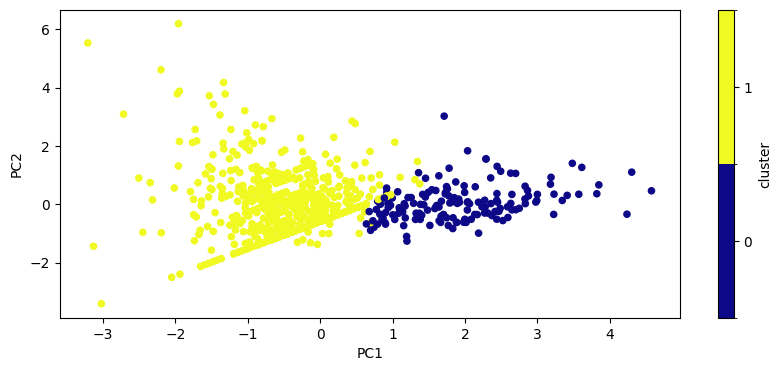

In [117]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42).fit(scaled_data) # Added random_state for reproducibility
predictions = kmeans.predict(scaled_data)

df_extended['cluster'] = pd.Categorical(predictions)

df_extended.plot.scatter(x='PC1', y='PC2', c='cluster', colormap='plasma', figsize=(10,4))

In [118]:
df_merge=df.copy()
df_merge['cluster'] = df_extended.cluster
df_merge.groupby('cluster')['Working'].median()

/tmp/ipython-input-879915004.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merge.groupby('cluster')['Working'].median()


,Working
cluster,
0,345.0
1,0.0


In [119]:
df_merge=df.copy()
df_merge['cluster'] = df_extended.cluster
df_merge.groupby('cluster')['Sleeping'].median()

/tmp/ipython-input-2541581541.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merge.groupby('cluster')['Sleeping'].median()


,Sleeping
cluster,
0,460.0
1,540.0


In [120]:
df_merge=df.copy()
df_merge['cluster'] = df_extended.cluster
df_merge.groupby('cluster')['Reading'].median()

/tmp/ipython-input-2869814687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merge.groupby('cluster')['Reading'].median()


,Reading
cluster,
0,10.0
1,40.0


# **Determine difference in activity variables based on Living Environment in Finland**

In [121]:
#Normality tests on working based on living evironment

results = {}

for group, subset in df.groupby('Living Environment'):
    S, p = shapiro(subset['Working'])
    results[group] = {'W-statistic': S, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

              W-statistic       p-value
City             0.565141  6.301164e-34
Municipality     0.552603  8.970446e-18
Rural Area       0.536646  5.630904e-19


In [122]:
groups = [subset['Working'].values for name, subset in df.groupby('Living Environment')]
stat, p = kruskal(*groups) # * is sued because the values are in arrays list
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

# We failed to reject the Null hypothesis as there is no difference in the working minutes based on the Living Environment.

Kruskal-Wallis H-statistic = 0.1742, p-value = 0.9166


In [123]:
results = {}

for group, subset in df.groupby('Living Environment'):
    S, p = shapiro(subset['Sleeping'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

              W-statistic       p-value
City              0.17423  3.148324e-08
Municipality      0.17423  7.701245e-03
Rural Area        0.17423  6.843513e-01


In [124]:
groups = [subset['Sleeping'].values for name, subset in df.groupby('Living Environment')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")


# # We reject the Null hypothesis as there is a difference in the sleeping minutes based on the Living Environment.

Kruskal-Wallis H-statistic = 10.8915, p-value = 0.0043


In [165]:
groups = df['Living Environment'].unique()

pairs = list(itertools.combinations(groups, 2))

results = []

for g1, g2 in pairs:
    data1 = df.loc[df['Living Environment'] == g1, 'Sleeping']
    data2 = df.loc[df['Living Environment'] == g2, 'Sleeping']

    stat, p = scipy.stats.mannwhitneyu(data1, data2, alternative='two-sided')
    results.append({'Group 1': g1, 'Group 2': g2, 'U-statistic': stat, 'p-value': p})

results_df = pd.DataFrame(results)
results_df['p-adj'] = multipletests(results_df['p-value'], method='bonferroni')[1] # to adjust the p-value so that the false-positive value also handles
results_df = results_df.sort_values('p-adj')
print(results_df)

      Group 1       Group 2  U-statistic   p-value     p-adj
0        City    Rural Area      29113.5  0.001096  0.003287
2  Rural Area  Municipality       9902.0  0.020705  0.062116
1        City  Municipality      31439.5  0.691099  1.000000


In [126]:
results = {}

for group, subset in df9.groupby('Living Environment'): #df9 where we remove 0s
    S, p = shapiro(subset['Reading'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# We reject the Null hypothesis of normally distributed.

              W-statistic       p-value
City               9902.0  1.099578e-20
Municipality       9902.0  3.657419e-09
Rural Area         9902.0  1.979612e-06


In [127]:
## kruskal-wallis test of reading on living environment

groups = [subset['Reading'].values for name, subset in df9.groupby('Living Environment')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

# # We failed to reject the Null hypothesis as there is no difference in the reading minutes based on the Living Environment.

Kruskal-Wallis H-statistic = 3.6951, p-value = 0.1576


In [128]:
contingency_table = pd.crosstab(df['Living Environment'], df['A4_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#there is association between them and we reject Ho.

Chi-square Test of Independence:

Chi2 Statistic = 16.4043
Degrees of Freedom = 2
P-value = 0.0003


In [129]:
contingency_table = pd.crosstab(df['Living Environment'], df['A5_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#there is no association between them and we failed to reject Ho.

Chi-square Test of Independence:

Chi2 Statistic = 3.7921
Degrees of Freedom = 2
P-value = 0.1502


# **Determine difference in activity variables based on Day Type in Finland**

In [130]:
df.head(1)

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,A1,A2,A3,A4,...,Living Environment,Day Type,Age Group,Working,Sleeping,Reading,A4_New,A5_New,A4_New_,A5_New_
0,50002,1,2,1,1.0,6,190,450,13,2.0,...,City,Weekend,45-54,190.0,450.0,13.0,2.0,1.0,No,Yes


In [131]:
results = {}

for group, subset in df0.groupby('Day Type'): #df0 where we remove 0s
    S, p = shapiro(subset['Working'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

             W-statistic   p-value
Weekend          3.79207  0.000021
Working Day      3.79207  0.005250


In [132]:
groups = [subset['Working'].values for name, subset in df0.groupby('Day Type')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's significant, we reject the Null Hypothesis

MannWhitneyU = 1700.0000, p-value = 0.0000


In [133]:
results = {}

for group, subset in df.groupby('Day Type'): #df0 where we remove 0s
    S, p = shapiro(subset['Sleeping'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

             W-statistic       p-value
Weekend           1700.0  9.334100e-06
Working Day       1700.0  5.552654e-07


In [134]:
groups = [subset['Sleeping'].values for name, subset in df.groupby('Day Type')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's not significant, we failed to reject the Null Hypothesis

MannWhitneyU = 73498.5000, p-value = 0.4912


In [135]:
results = {}

for group, subset in df9.groupby('Day Type'): #df0 where we remove 0s
    S, p = shapiro(subset['Reading'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

             W-statistic       p-value
Weekend          73498.5  1.531405e-16
Working Day      73498.5  4.231960e-18


In [136]:
groups = [subset['Reading'].values for name, subset in df9.groupby('Day Type')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's significant, we reject the Null Hypothesis

MannWhitneyU = 38785.5000, p-value = 0.0001


In [137]:
contingency_table = pd.crosstab(df['Day Type'], df['A4_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#we failed to reject Ho so there is no association

Chi-square Test of Independence:

Chi2 Statistic = 1.4956
Degrees of Freedom = 1
P-value = 0.2213


In [138]:
contingency_table = pd.crosstab(df['Day Type'], df['A5_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#we failed to reject Ho  so there is no association

Chi-square Test of Independence:

Chi2 Statistic = 0.1958
Degrees of Freedom = 1
P-value = 0.6582


# **Determine difference in activity variables based on Gender in Finland**

In [139]:
results = {}

In [140]:
for group, subset in df0.groupby('Gender'): #df0 where we remove 0s
    S, p = shapiro(subset['Working'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

        W-statistic   p-value
Female     0.195762  0.016192
Male       0.195762  0.006541


In [141]:
groups = [subset['Working'].values for name, subset in df0.groupby('Gender')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's not significant, we failed to reject the Null Hypothesis

MannWhitneyU = 4445.0000, p-value = 0.4767


In [142]:
for group, subset in df.groupby('Gender'): #df0 where we remove 0s
    S, p = shapiro(subset['Sleeping'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

        W-statistic       p-value
Female       4445.0  6.575888e-07
Male         4445.0  8.802858e-06


In [143]:
groups = [subset['Sleeping'].values for name, subset in df.groupby('Gender')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's not significant, we failed to reject the Null Hypothesis

MannWhitneyU = 75697.0000, p-value = 0.9430


In [144]:
for group, subset in df9.groupby('Gender'): #df0 where we remove 0s
    S, p = shapiro(subset['Reading'])
    results[group] = {'W-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

# # We reject the Null hypothesis of normally distributed.

        W-statistic       p-value
Female      75697.0  4.086349e-18
Male        75697.0  3.423601e-17


In [145]:
groups = [subset['Reading'].values for name, subset in df9.groupby('Gender')]
stat, p = mannwhitneyu(*groups)
print(f"MannWhitneyU = {stat:.4f}, p-value = {p:.4f}")

# it's not significant, we failed to reject the Null Hypothesis

MannWhitneyU = 32726.5000, p-value = 0.7922


In [146]:
contingency_table = pd.crosstab(df['Gender'], df['A4_New'])

# Run Chi-Square Test of Independence
stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#we failed to reject Ho so there is no association

Chi-square Test of Independence:

Chi2 Statistic = 1.2974
Degrees of Freedom = 1
P-value = 0.2547


In [147]:
contingency_table = pd.crosstab(df['Gender'], df['A5_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

#we failed to reject Ho so there is no association

Chi-square Test of Independence:

Chi2 Statistic = 2.9073
Degrees of Freedom = 1
P-value = 0.0882


# **Determine difference in activity variables based on Age Group in Finland**

In [148]:
results={}

#Normality tests on working based on living evironment
for group, subset in df0.groupby('Age Group'): #df0 where we remove 0s
    S, p = shapiro(subset['Working'])
    results[group] = {'W-statistic': S, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

       W-statistic   p-value
20-24     0.924630  0.431947
25-34     0.967743  0.319302
35-44     0.934762  0.011338
45-54     0.960609  0.027054
55-64     0.915931  0.031537
65-74          NaN       NaN
75+            NaN       NaN


/tmp/ipython-input-438755045.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  S, p = shapiro(subset['Working'])


In [149]:
groups = [subset['Working'].values for name, subset in df0.groupby('Age Group')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

# # We failed to reject the Null hypothesis as there is no difference in the working minutes based on the Age Group.

Kruskal-Wallis H-statistic = 7.5654, p-value = 0.2717


In [150]:
results={}
#Normality tests on working based on living evironment
for group, subset in df.groupby('Age Group'):
    S, p = shapiro(subset['Sleeping'])
    results[group] = {'W-statistic': S, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

       W-statistic       p-value
20-24     0.965785  3.554427e-01
25-34     0.977082  6.329291e-02
35-44     0.948352  7.454798e-05
45-54     0.980841  1.899561e-02
55-64     0.933346  6.063292e-07
65-74     0.963669  3.862256e-03
75+       0.948820  1.267254e-02


In [151]:
groups = [subset['Sleeping'].values for name, subset in df.groupby('Age Group')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

# # We reject the Null hypothesis as there is significant difference in the sleeping minutes based on the Age Group.

Kruskal-Wallis H-statistic = 15.5016, p-value = 0.0167


In [152]:
groups = df['Age Group'].unique()

# Create all pairwise combinations
pairs = list(itertools.combinations(groups, 2))

results = []

for g1, g2 in pairs:
    data1 = df.loc[df['Age Group'] == g1, 'Sleeping']
    data2 = df.loc[df['Age Group'] == g2, 'Sleeping']

    stat, p = scipy.stats.mannwhitneyu(data1, data2, alternative='two-sided')
    results.append({'Group 1': g1, 'Group 2': g2, 'U-statistic': stat, 'p-value': p})

# Convert to DataFrame for nice output
results_df = pd.DataFrame(results)
print(results_df)


   Group 1 Group 2  U-statistic   p-value
0    45-54   55-64      13805.0  0.804233
1    45-54   25-34       9471.5  0.474440
2    45-54   65-74       8950.5  0.395440
3    45-54   20-24       2302.5  0.061580
4    45-54     75+       4053.0  0.011437
5    45-54   35-44      11906.5  0.361791
6    55-64   25-34       9420.5  0.283284
7    55-64   65-74       8723.5  0.429774
8    55-64   20-24       2200.0  0.047825
9    55-64     75+       4056.0  0.025103
10   55-64   35-44      11803.5  0.214062
11   25-34   65-74       5251.5  0.141362
12   25-34   20-24       1376.5  0.038778
13   25-34     75+       2336.5  0.002875
14   25-34   35-44       7040.0  0.934281
15   65-74   20-24       1535.0  0.087687
16   65-74     75+       2936.0  0.127162
17   65-74   35-44       8283.5  0.104612
18   20-24     75+       1085.0  0.712052
19   20-24   35-44       2734.5  0.049798
20     75+   35-44       5128.5  0.002236


In [153]:
if p < 0.05:
    for i in results_df.index:
        if results_df.loc[i, 'p-value'] < 0.05:
            print(results_df.loc[i, 'Group 1'], results_df.loc[i, 'Group 2'])

45-54 75+
55-64 20-24
55-64 75+
25-34 20-24
25-34 75+
20-24 35-44
75+ 35-44


In [154]:
results={}

#Normality tests on working based on living evironment
for group, subset in df9.groupby('Age Group'): #df9 where we remove 0s
    S, p = shapiro(subset['Reading'])
    results[group] = {'W-statistic': S, 'p-value': p}

results_df = pd.DataFrame(results).T
print(results_df)

       W-statistic       p-value
20-24     0.767665  3.537687e-03
25-34     0.767733  1.536929e-06
35-44     0.691737  2.919618e-11
45-54     0.744813  6.496290e-13
55-64     0.763717  1.288824e-12
65-74     0.824739  2.623683e-09
75+       0.939297  9.557027e-03


In [155]:
groups = [subset['Reading'].values for name, subset in df9.groupby('Age Group')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

# # We reject the Null hypothesis as there is signficant difference in the sleeping minutes based on the Age Group

Kruskal-Wallis H-statistic = 56.8550, p-value = 0.0000


In [156]:
groups = df9['Age Group'].unique()

pairs = list(itertools.combinations(groups, 2))

results = []

for g1, g2 in pairs:
    data1 = df9.loc[df9['Age Group'] == g1, 'Reading']
    data2 = df9.loc[df9['Age Group'] == g2, 'Reading']

    stat, p = scipy.stats.mannwhitneyu(data1, data2, alternative='two-sided')
    results.append({'Group 1': g1, 'Group 2': g2, 'U-statistic': stat, 'p-value': p})

# Convert to DataFrame for nice output
results_df = pd.DataFrame(results)
print(results_df)

   Group 1 Group 2  U-statistic   p-value
0    45-54   55-64       5244.0  0.001055
1    45-54   65-74       3797.5  0.000067
2    45-54   25-34       2892.5  0.019998
3    45-54     75+       1693.5  0.000003
4    45-54   20-24        785.5  0.206734
5    45-54   35-44       4372.5  0.952900
6    55-64   65-74       5252.0  0.265801
7    55-64   25-34       3435.5  0.000045
8    55-64     75+       2450.0  0.016215
9    55-64   20-24        976.5  0.008664
10   55-64   35-44       5650.5  0.002678
11   65-74   25-34       2808.5  0.000022
12   65-74     75+       2129.5  0.100422
13   65-74   20-24        802.5  0.004887
14   65-74   35-44       4764.0  0.000288
15   25-34     75+        462.0  0.000003
16   25-34   20-24        202.5  0.695235
17   25-34   35-44       1106.0  0.020593
18     75+   20-24        480.0  0.000815
19     75+   35-44       2883.5  0.000015
20   20-24   35-44        315.0  0.208735


In [157]:
for i in results_df.index:
        if results_df.loc[i, 'p-value'] < 0.05:
            print(results_df.loc[i, 'Group 1'], results_df.loc[i, 'Group 2']) # groups those are significant

45-54 55-64
45-54 65-74
45-54 25-34
45-54 75+
55-64 25-34
55-64 75+
55-64 20-24
55-64 35-44
65-74 25-34
65-74 20-24
65-74 35-44
25-34 75+
25-34 35-44
75+ 20-24
75+ 35-44


In [158]:
contingency_table = pd.crosstab(df['Age Group'], df['A4_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

Chi-square Test of Independence:

Chi2 Statistic = 90.5619
Degrees of Freedom = 6
P-value = 0.0000


In [159]:
contingency_table = pd.crosstab(df['Age Group'], df['A5_New'])

stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence:\n")
print(f"Chi2 Statistic = {stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

Chi-square Test of Independence:

Chi2 Statistic = 58.5917
Degrees of Freedom = 6
P-value = 0.0000
